In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from torch.autograd.functional import jacobian

In [3]:
def Newton_solver(xk,f,jacob,step):
    yk = f(xk).squeeze()
    xk -= step*torch.linalg.solve(jacob,yk)
    return xk

def newton(xk,f,jacob,step):
    while torch.norm(f(xk)) >= 1e-2:
        xk = Newton_solver(xk,f,jacob,step)
    return xk

In [4]:
# Initialize model parameters (mean and variance) according to explanation above; also parameters of distribution we're trying to match
m = 2 # Dimension of distributions
m0 = np.zeros(m)
s0 = np.eye(m)
a = torch.tensor([5, 5], dtype=torch.float64, requires_grad=True)  # Example tensor for a
mt = a
st = 1
gamma = 0.05 # -> This is just the "step size" in the proximal step
d = 1000 # how many particles we have at each step

# Initializing arrays that will keep updates of means and variances
n = 100
particles = [torch.from_numpy(np.random.multivariate_normal(m0,s0,d))]

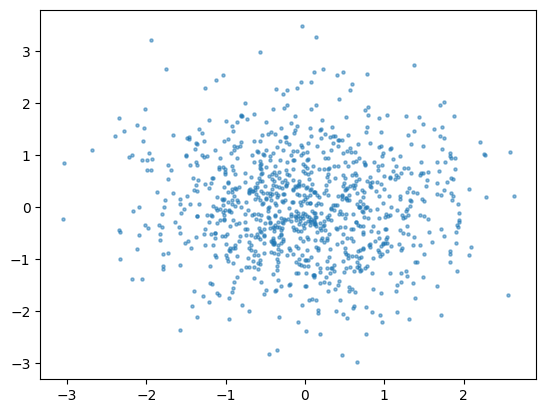

In [5]:
plt.scatter(particles[0][:, 0], particles[0][:, 1], s=5, alpha=0.5)

In [6]:
# Set iterative updates
x_old = torch.tensor([1, 1], dtype=torch.float64, requires_grad=True)  # Example tensor for x_old
f = lambda x: x - (gamma/(1+gamma))*torch.tanh(torch.dot(a,x))*a - ((1-gamma)/(1+gamma))*x_old - (gamma/(1+gamma))*torch.tanh(torch.dot(a,x_old))*a - torch.sqrt(torch.tensor(4*gamma))/(1+gamma)*z
old_particles = particles[0]

for i in range(1,n+1):
    tmp_particles = torch.zeros(d,m)

    for j in range(0,d):
        # Update particles
        x_old = old_particles[j]
        z = torch.from_numpy(np.random.multivariate_normal(m0,s0,1))
        jacob = jacobian(f,x_old).squeeze()
        print(jacob)
        # print(jacob.size())
        # print(f(x_old).size())
        
        tmp_particles[j] = newton(x_old,f,jacob,0.95)
        print("Just finished inner iteration: " + str(j)) 

    particles.append(tmp_particles)
    old_particles = tmp_particles  
    print("Just finished iteration number: " + str(i))  

tensor([[ 0.9275, -0.0725],
        [-0.0725,  0.9275]], dtype=torch.float64)
Just finished inner iteration: 0
tensor([[ 0.8529, -0.1471],
        [-0.1471,  0.8529]], dtype=torch.float64)
Just finished inner iteration: 1
tensor([[ 1.0000e+00, -2.9856e-07],
        [-2.9856e-07,  1.0000e+00]], dtype=torch.float64)
Just finished inner iteration: 2
tensor([[ 1.0000e+00, -1.7086e-06],
        [-1.7086e-06,  1.0000e+00]], dtype=torch.float64)
Just finished inner iteration: 3
tensor([[ 0.3259, -0.6741],
        [-0.6741,  0.3259]], dtype=torch.float64)
Just finished inner iteration: 4
tensor([[ 9.9972e-01, -2.7813e-04],
        [-2.7813e-04,  9.9972e-01]], dtype=torch.float64)
Just finished inner iteration: 5
tensor([[ 9.9995e-01, -4.8781e-05],
        [-4.8781e-05,  9.9995e-01]], dtype=torch.float64)
Just finished inner iteration: 6
tensor([[ 0.8013, -0.1987],
        [-0.1987,  0.8013]], dtype=torch.float64)
Just finished inner iteration: 7
tensor([[ 0.5177, -0.4823],
        [-0.4823,  0

KeyboardInterrupt: 

In [10]:
f(x_old).squeeze()

tensor([ 0.2622, -0.1203], dtype=torch.float64, grad_fn=<SqueezeBackward0>)

In [32]:
sev = torch.zeros(d,m,requires_grad=True)
sev[0].requires_grad

True

In [36]:
# Define the function f as a PyTorch tensor function
gamma = 0.5  # Example value for gamma
a = torch.tensor([5, 5], dtype=torch.float64, requires_grad=True)  # Example tensor for a
x_old = torch.tensor([1, 1], dtype=torch.float64, requires_grad=True)  # Example tensor for x_old
z = torch.from_numpy(np.random.multivariate_normal(m0,s0,1))  # Example value for z

f = lambda x: x - (gamma/(1+gamma))*torch.tanh(torch.dot(a,x))*a - ((1-gamma)/(1+gamma))*x_old-(gamma/(1+gamma))*torch.tanh(torch.dot(a,x_old))*a - torch.sqrt(torch.tensor(4*gamma))/(1+gamma)*z

# Define input x
x = torch.tensor([0, 0], dtype=torch.float64, requires_grad=True)

# Compute the derivative of f with respect to x
jacob = (jacobian(f, x_old)).squeeze()

print("Jacobian:", jacob)

Jacobian: tensor([[ 1.0000e+00, -6.8705e-08],
        [-6.8705e-08,  1.0000e+00]], dtype=torch.float64)
